In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from fuzzytools.files import search_for_filedirs
from synthsne import _C

rootdir = '../../surveys-save'
filedirs = search_for_filedirs(rootdir, fext=_C.EXT_SPLIT_LIGHTCURVE)

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir
from lchandler import _C

def load_lcdataset(filename):
    assert filename.split('.')[-1]==_C.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

method = 'spm-mcmc-estw'
filedir = f'../../surveys-save/b/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux', 'boostrap_counter_total', 'boostrap_counter'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic_mode'])
LCDataset:
[outliers - samples 10]
(.) obs_samples=541 - min_len=14 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=1.0[days]
(g) obs_samples=260 - min_len=6 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=3.0[days]
(r) obs_samples=281 - min_len=8 - max_dur=376.0[days] - dur(p50)=128.7[days] - cadence(p50)=3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |████    | SNII-b-n - 5/10 (50.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples=1,107 - min_len=7 - max_dur=298.1[days] - dur(p50)=40.5[days] - cadence(p50)=1.0[days]
(g) obs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


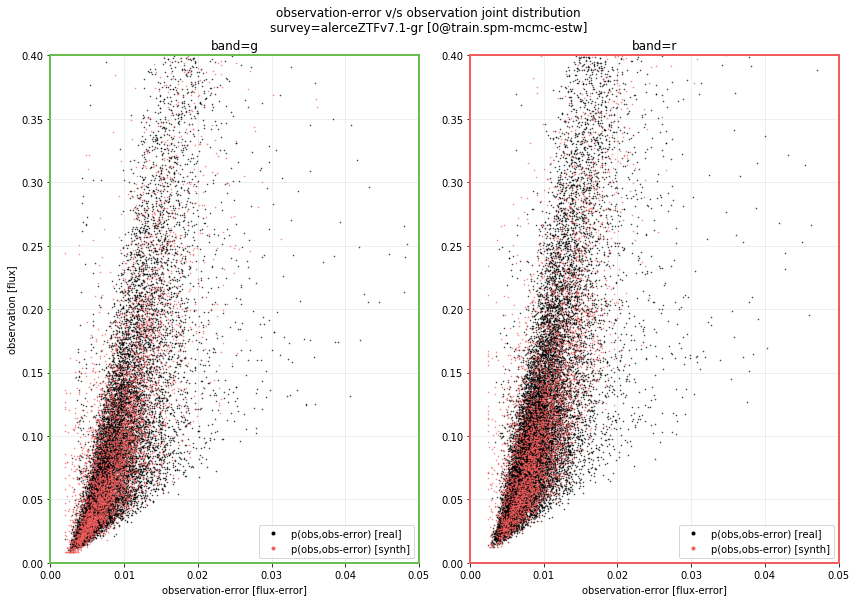

In [23]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.scatters import plot_obs_obse_scatter

#plot_obs_obse_scatter(lcdataset, 'train', 'train_curvefit', n=2000)
kf = '0'
plot_ndict = {
    f'{kf}@train':None,
    f'{kf}@train.{method}':5e3,
}
plot_obs_obse_scatter(lcdataset, list(plot_ndict.keys()), plot_ndict=plot_ndict)
#plot_values_distribution(lcdataset, 'train', 'obs')
#plot_values_distribution(lcdataset, 'train_curvefit', 'obs')